The Python package 'matplotlib' is the 'grandfather' library of almost all data visualization packages in Python. It was created by John Hunter who tried to replicate MATLAB's plotting capabilities in Python.

It is an excellent 2D and 3D graphics library for generating scientific figures. Some of the major pros of 'matplotlib' are:

* generally easy to get started for simple plots
* support for custom labels and texts
* great control of every element in a figure
* high-quality output in many formats
* very customizable in general

'Matplotlib' allows you to create reproducible figures programmatically. The official documentation for'matplotlib' is listed here: http://matplotlib.org/. 

In [1]:
import matplotlib.pyplot as plt

Now there is a special command used in jupyter notebook setting. You'll need to use the following line to see plots in the notebook:

In [2]:
%matplotlib inline

Notice that this line above is only for jupyter notebooks, so if you are using another editor, you'll use: plt.show() at the end of all your plotting commands to have the figure pop up in another window.

The 'matplotlib' package works the best for objects in 'numpy' and 'pandas'. So we will start with the most basic examples involving arrays. In the following example, we use the linspace() function to create an array with evenly-spaced numbers. We then create a simple line plot and then build up the variations of the plot from there.

In [3]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2
z = x + 3
print('x:', x)
print('y:', y)
print('z:', z)

x: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
y: [ 0.    0.25  1.    2.25  4.    6.25  9.   12.25 16.   20.25 25.  ]
z: [3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8. ]


Text(0.5,1,'Title Here')

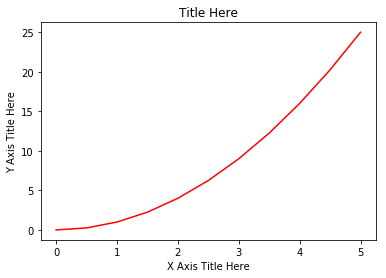

In [4]:
plt.plot(x, y, color='r') # 'r' is the color red and there are other arguments
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('Title Here')
# plt.show()

Notice that the xlabel() and ylabel() commands etc. must follow the plot() command. The order is important here, because Python has to construct the plot object first and then use that for later add-on features. The last command plt.show() is optional. If you do not type the command, the result will be written out directly as objects, whereas having that line will only print the object out in the jupyter notebook (this is very similar to the scenario of typing x vs. print(x) when x is a list or a 'DataFrame' object etc.). 

Now let's do multiplots on the same canvas. This is achieved through the use of subplot() method ('sub' here stands for 'subsequent'). The subplot() method is very similar to the mfrow() function in R. It specifies the row and column of the canvass and the index of the current plot. Suppose we want to create three plots horizontally. This is what we do:

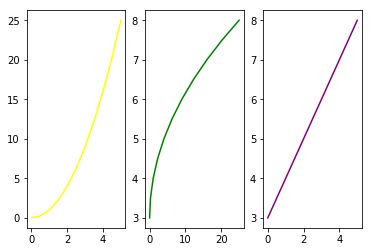

In [5]:
# plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,3,1)
plt.plot(x, y, color='yellow') # More on color options later
plt.subplot(1,3,2)
plt.plot(y, z, color='green')
plt.subplot(1,3,3)
plt.plot(x, z, color='purple')
plt.show()

Now that we've seen the basics, let's break it all down with a more formal introduction to the package's object-oriented API. What we mean here is that we will instantiate figure objects and then call methods or attributes from that object. The main idea in using the more formal object-oriented method is to create figure objects and then just call methods or attributes off of that object. This approach is nicer when dealing with a canvas that has multiple plots on it.

This object-oriented approach may be confusing at first sight for new Python learners. But if you have dealt with the 'ggplot2' library in R, the idea is extremely similar and it will resonate with you when the syntaxes in Python are shown. Essentially, you may think of the process as building objects and then add additional attributes or calling existing methods to the object so that the final product has displays of wanted features from the user. We will run the code step-by-step and this concept will become clearer as we move along.

To begin we first create a figure instance as a blank canvas using the plt.figure() method. Then we can add axes to that figure and then set lables on top of that existing object:

Text(0.5,1,'Set Title Here')

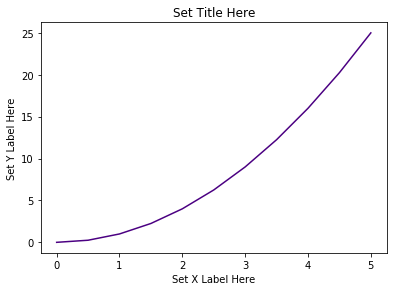

In [6]:
fig = plt.figure() # creating an empty canvas
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # passing a list for left, bottom, width, height (range 0 to 1)
axes.plot(x, y, 'indigo')
axes.set_xlabel('Set X Label Here') # notice the use of set_ to begin methods
axes.set_ylabel('Set Y Label Here')
axes.set_title('Set Title Here')

What's the benefit of this style of programming? The real winners here are the users who can have total control about the graphical displays. Everything is object-oriented so it's easy for the programmer to rearrange things without breaking the code. It essentially helps the programmer have more flexibility.

Below is an example that illustrate this point. Because of the flexibility of the package, we can create another axis within the existing frame:

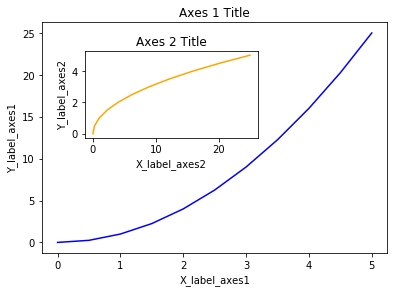

In [7]:
fig = plt.figure()

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'blue')
axes1.set_xlabel('X_label_axes1')
axes1.set_ylabel('Y_label_axes1')
axes1.set_title('Axes 1 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'orange')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

The subplot() method can be done in a similar fashion. Basically, the plt.subplots() object will act as a more automatic axis manager.

Text(0.5,1,'title here')

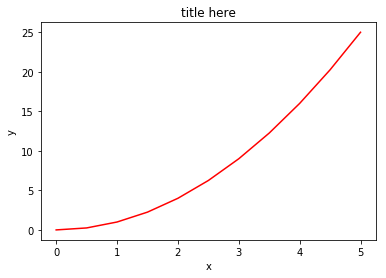

In [8]:
fig,axes = plt.subplots() 
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title here')

This is essentially the same as what we were doing before. Examining the example above, we see that the first thing we do is tuple-unpacking: recall that when you use tuples or lists on the left side of the equality sign, Python pairs objects on the right side with targets on the left and assigns them from left to right. Tuple unpacking requires that the list of variables on the left has the same number of elements as the length of the tuple. Once the first step is done, we invoke the plot() method on the 'axes' object together with the rest of the methods. The final result is the same as when we are not using the subplot() method: you have one graph to display, and it is the basic line plot.  

The subplot becomes handy because you can specify the number of rows and columns when creating the subplots() object. To start with, we specify the rows and columns first:

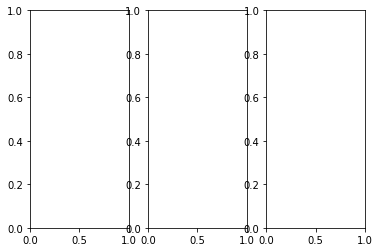

In [9]:
fig,axes = plt.subplots(nrows=1, ncols=3) # creating an empty canvas of 1 by 3 subplots

Notice that from the above, we have a lot of overlays. To fix this, we can just add one more line as below. Python will automatically deal with overlays and spacing awkwardness for multiple plots:

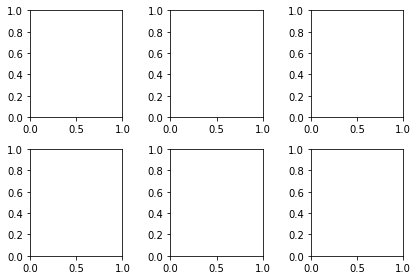

In [10]:
fig,axes = plt.subplots(nrows=2, ncols=3) # creating an empty canvas of 2 by 3 subplots
plt.tight_layout()

Now taking a step back, let's focus on the 1 by 2 plot as before. A close examination of the objects tells us that the 'axes' object is a like a list (see code below). This means we can iterate it throughout and obtain the final version of the multiplots. 

In [11]:
print(type(axes))
axes

<class 'numpy.ndarray'>


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002140BBCCB70>,
      dtype=object)

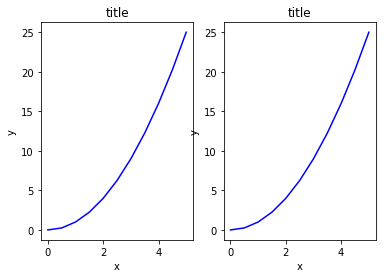

In [12]:
fig,axes = plt.subplots(nrows=1, ncols=2) # creating an empty canvas of 1 by 2 subplots
for j in axes:
    j.plot(x, y, 'b')
    j.set_xlabel('x')
    j.set_ylabel('y')
    j.set_title('title')

We can also perform indexing on the plots:

Text(0.5,1,'Second Plot')

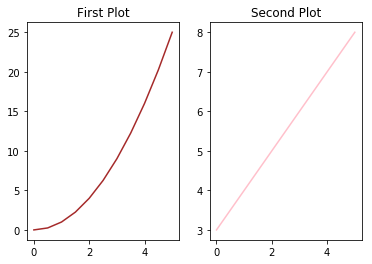

In [13]:
fig,axes = plt.subplots(nrows=1, ncols=2)

axes[0].plot(x,y,'brown')
axes[0].set_title('First Plot')
axes[1].plot(x,z,'pink')
axes[1].set_title('Second Plot')

We now learn how to fine-tune the figure size and DPI(dots-per-inch, or pixels-per-inch). in the figure() method, the 'figsize' argument is a tuple of the width and height of the figure in inches, and the 'dpi' argument is the dots-per-inch (pixel per inch).

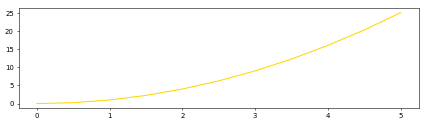

In [14]:
fig = plt.figure(figsize=(8,2), dpi=50)
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y, color='gold')

Now compare the picture above with the picture below to see the effect of changes on DPI:

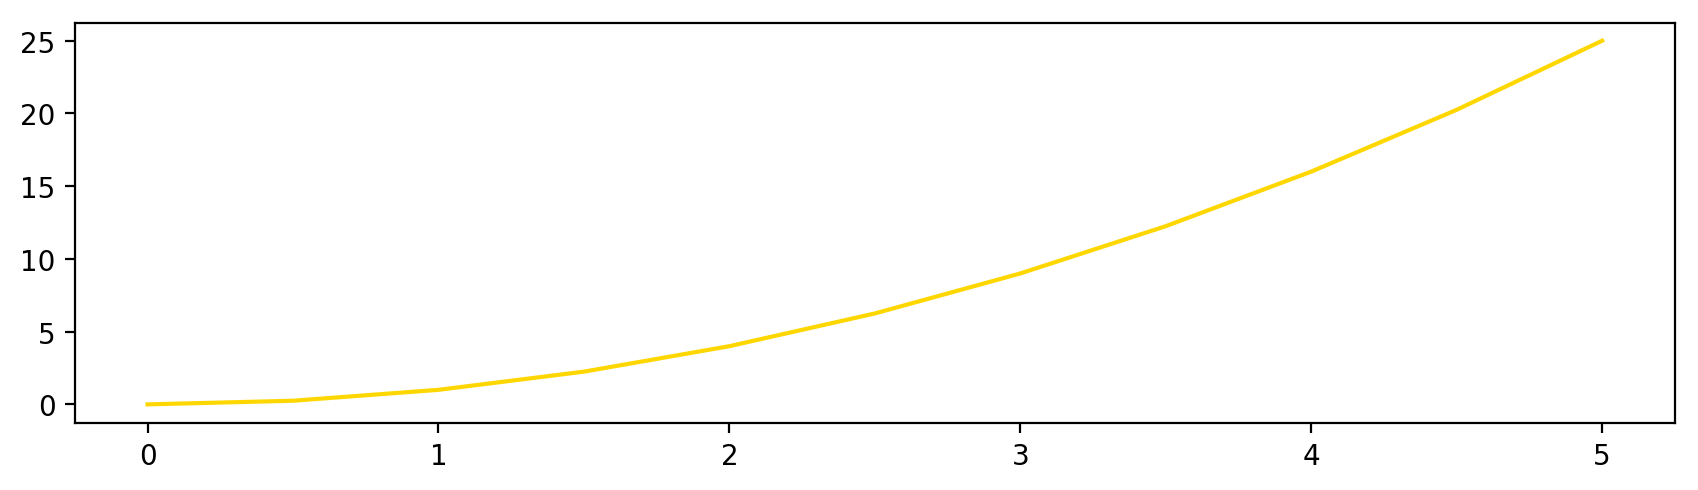

In [15]:
fig = plt.figure(figsize=(8,2), dpi=200)
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y, color='gold')

For another example, let's fix DPI and change the figure size:

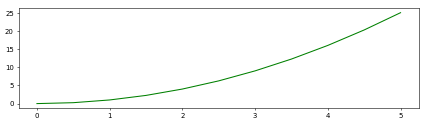

In [16]:
fig = plt.figure(figsize=(8,2), dpi=50)
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y, color='green')

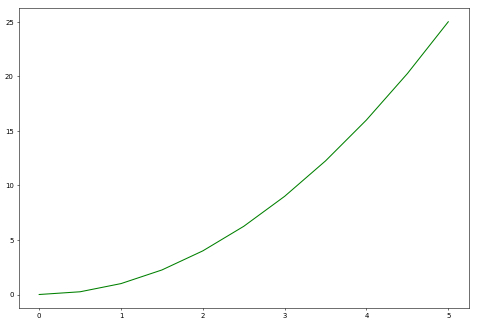

In [17]:
fig = plt.figure(figsize=(9,6), dpi=50)
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y, color='green')

The same arguments can also be passed to layout managers, such as the subplots function:

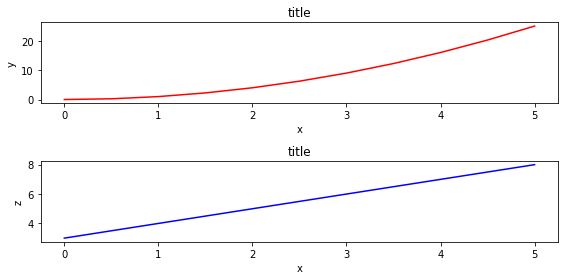

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,4))

axes[0].plot(x, y, 'r')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('title')

axes[1].plot(x, z, 'blue')
axes[1].set_xlabel('x')
axes[1].set_ylabel('z')
axes[1].set_title('title')

plt.tight_layout()

Now let's learn how to save figures. 'Matplotlib' can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. To save a figure to a file we can use the savefig() method in the Figure class. One cautionary note is that when you specify the file path, it needs to use the raw string, double your slashes or use forward slashes instead(see https://stackoverflow.com/questions/18084554/why-do-i-get-a-syntaxerror-for-a-unicode-escape-in-my-file-path)

In [19]:
fig.savefig(r"C:\Users\pgao\Documents\PGZ Documents\Programming Workshop\PYTHON\Open Courses on Python\Udemy Course on Python\Introduction to Data Science Using Python\datasets\fig.png", dpi=100)

Next, we discuss legends. Legends are often used in scenarios when, for example, two lines are drawn in one frame. Below is an example. One can see that there are three functions graphed in the same picture. Because this could be confusing, we need to add legends:

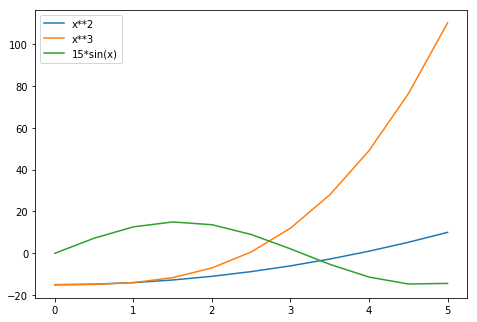

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2-15, label="x**2")
ax.plot(x, x**3-15, label="x**3")
ax.plot(x, 15*np.sin(x), label="15*sin(x)")
ax.legend(loc=2) # numeric code to indicate where to put the legends

The legend() function takes an optional keyword argument 'loc' that can be used to specify where in the figure the legend is to be drawn. The allowed values of 'loc' are numerical codes for the various places the legend can be drawn. Some of the most common 'loc' values are: 1 (upper right corner), 2 (upper left corner), 3 (lower left corner) and 4 (lower right corner). There are more options actually available (see http://matplotlib.org/users/legend_guide.html#legend-location for more detail). The most common location is to set loc=0, which implies optimal location. 

Next we talk about customizations such as setting colors, line widths, and line types. Just like R and MATLAB, 'matplotlib' gives you a lot of options for user customization, and the syntax can be very similar to MATLAB's grammar. 

To start with, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where 'b' means blue, 'g' means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots. Below is an example:

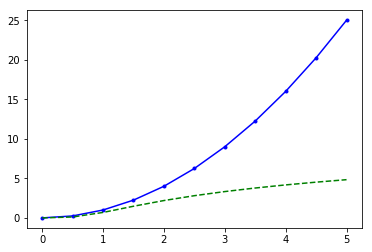

In [21]:
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, np.log(x**3+1), 'g--') # green dashed line

The MATLAB style syntax can be very handy if you are familiar with the MATLAB coding. But for most people, it might be more straightforward if we just code colors in a more traditional way. In other words, we can define colors by their names or RGB hex codes and optionally provide an alpha value using the 'color' and 'alpha' keyword arguments. Alpha indicates opacity, just like what we see in 'ggplot2' from R:

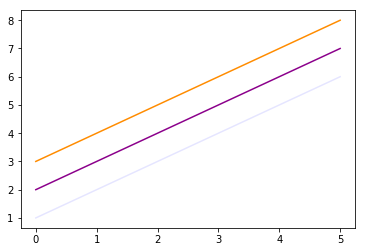

In [22]:
fig, ax = plt.subplots()
ax.plot(x, x+1, color="blue", alpha=0.1) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code 

To change the line width, we can use the 'linewidth' or 'lw' keyword argument. The line style can be selected using the 'linestyle' or 'ls' keyword arguments. There are other features too. For example, the 'marker' option is very useful for plotting lines, especially if you have a discrete set of data points, markers will highlight where exatly the point lies on the picture. If you want to change the marker size, you can invoke the 'markersize' argument. Other options such as 'markerfacecolor', 'markeredgecolor', and 'markeredgewidth', or 'markeredgecolor' can also be used to enhance the visualization effect. Below is a set of examples: 

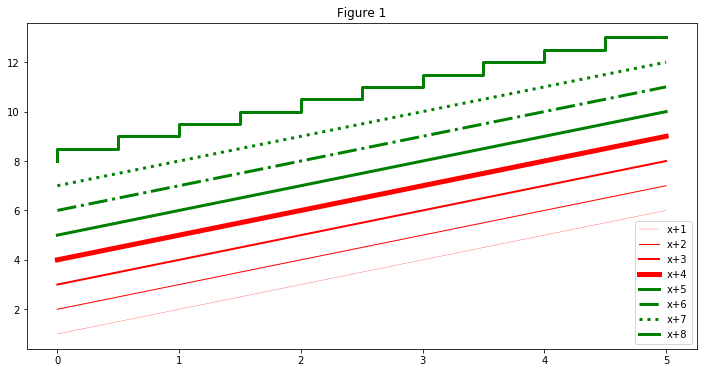

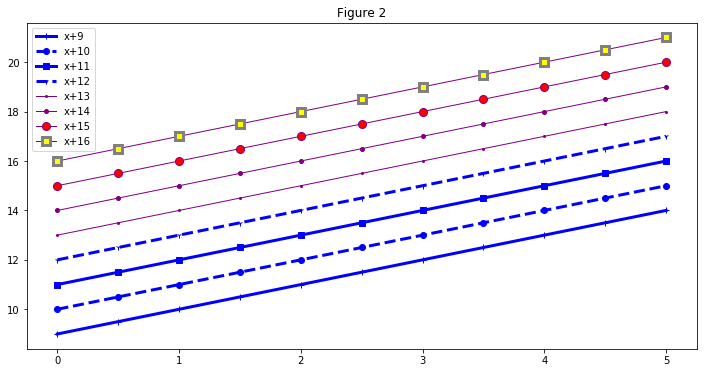

In [23]:
fig1, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(x, x+1, color="red", linewidth=0.25, label='x+1')
ax1.plot(x, x+2, color="red", linewidth=1, label='x+2')
ax1.plot(x, x+3, color="red", linewidth=2.00, label='x+3')
ax1.plot(x, x+4, color="red", linewidth=5.00, label='x+4')
ax1.plot(x, x+5, color="green", lw=3, linestyle='-', label='x+5')
ax1.plot(x, x+6, color="green", lw=3, ls='-.', label='x+6')
ax1.plot(x, x+7, color="green", lw=3, ls=':', label='x+7')
ax1.plot(x, x+8, color="green", lw=3, ls='steps', label='x+8')
ax1.set_title('Figure 1')
plt.legend()
plt.show()

fig2, ax2 = plt.subplots(figsize=(12,6))
ax2.plot(x, x+9, color="blue", lw=3, ls='-', marker='+', label='x+9')
ax2.plot(x, x+10, color="blue", lw=3, ls='--', marker='o', label='x+10')
ax2.plot(x, x+11, color="blue", lw=3, ls='-', marker='s', label='x+11')
ax2.plot(x, x+12, color="blue", lw=3, ls='--', marker='1', label='x+12')
ax2.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2, label='x+13')
ax2.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4, label='x+14')
ax2.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red", label='x+15')
ax2.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, markerfacecolor="yellow", markeredgewidth=3, 
         markeredgecolor="grey", label='x+16')
ax2.set_title('Figure 2')
plt.legend()
plt.show()

Now let's look at controlling axis sizing properties in a 'matplotlib' figure. We can configure the ranges of the axes using the set_ylim() and set_xlim() methods in the axis object, or axis('tight') for automatically getting "tightly fitted" axes ranges. This is all very similar to basic plotting in R.

Be super cautious when we are trying to control the axis limit using set_ylim() and set_xlim(). When you don't have a lot of data points, drawing a line with limits set on them will make the curve less smooth in general. 

Text(0.5,1,'custom axes range')

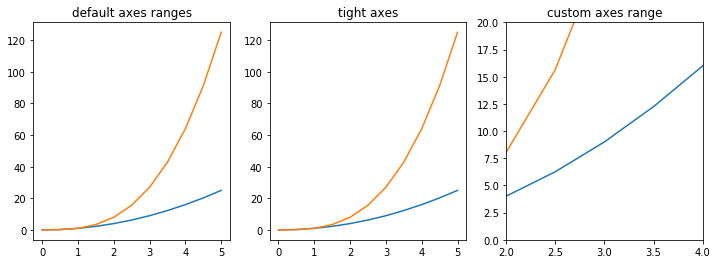

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 20]) # the list specifies lower bound and upper bound for plotting
axes[2].set_xlim([2, 4])
axes[2].set_title("custom axes range")

Lastly, we will talk about other types of plots. There are many specialized plots we can create, such as barplots, histograms, scatterplots, and much more. Most of these type of plots can be created using 'seaborn', a statistical plotting library for Python which we will introduce in the future. But here are a few examples of these type of plots:

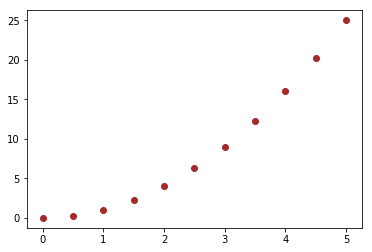

In [25]:
plt.scatter(x,y, color='brown') # scattering plot

(array([ 8., 11., 12., 13., 14.,  8.,  7.,  9., 11.,  7.]),
 array([  3. , 102.6, 202.2, 301.8, 401.4, 501. , 600.6, 700.2, 799.8,
        899.4, 999. ]),
 <a list of 10 Patch objects>)

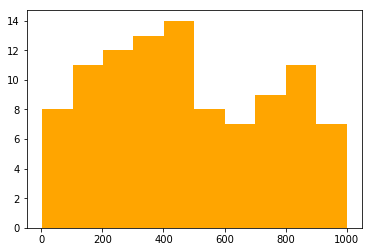

In [26]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data, color='orange') # histogram

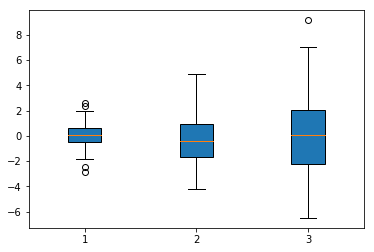

In [27]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]
plt.boxplot(data,vert=True,patch_artist=True) # rectangular box plot
plt.show()

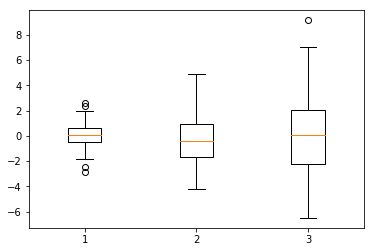

In [28]:
plt.boxplot(data,vert=True,patch_artist=False) # rectangular box plot
plt.show()

Below are some useful links for 'matlibplot':
* http://www.matplotlib.org - official documentation
* https://github.com/matplotlib/matplotlib - the source code for matplotlib
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference